ValueError: num must be 1 <= num <= 4, not 5

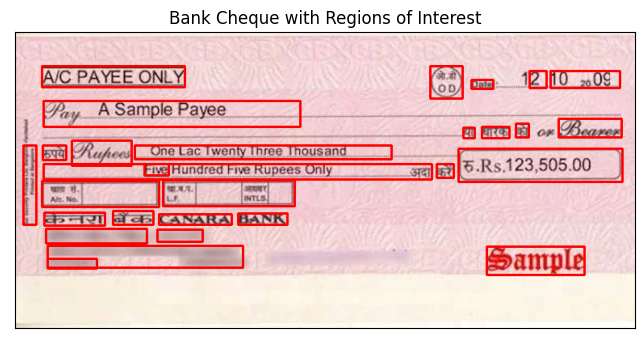

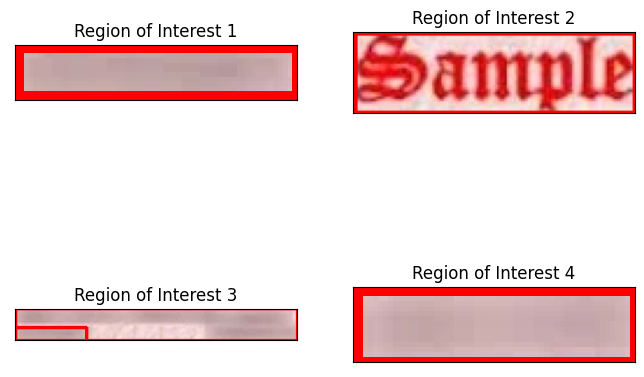

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('BankCheque1.webp')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold the image
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define regions of interest
rois = []
for contour in contours:
    # Get bounding rectangle
    x, y, w, h = cv2.boundingRect(contour)
    
    # Define regions of interest
    if h > 10 and w > 10:
        roi = img[y:y+h, x:x+w]
        rois.append(roi)
        
        # Draw rectangle around the region of interest
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)

# Display the image with rectangles around the regions of interest
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Bank Cheque with Regions of Interest')
plt.xticks([]), plt.yticks([])

# Show each region of interest
plt.figure(figsize=(8, 6), dpi=100)
for i, roi in enumerate(rois):
    plt.subplot(2, 2, i+1)
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title(f'Region of Interest {i+1}')
    plt.xticks([]), plt.yticks([])

# Adjust the layout so that the output does not exceed the size limit
plt.tight_layout()

# Show the plots
plt.show()
